# Importing Necessary Libraries

In [1]:
import pandas as pd # type: ignore # type: ignored 
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # type: ignore
import joblib # type: ignore

# Load The Dataset

In [2]:
file_path = 'synthetic_sleep_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate,Stress Level
0,9.0,25.0,97.6,9.0,98.0,0.0,4.9,100.0,0.0
1,10.0,17.0,99.0,5.0,95.0,1.0,8.5,77.0,1.0
2,0.0,25.0,98.0,3.0,90.0,0.0,6.2,96.0,1.0
3,2.0,23.0,98.8,9.0,93.0,0.0,4.4,100.0,0.0
4,9.0,24.0,97.6,8.0,100.0,0.0,4.3,87.0,0.0


In [3]:
df.shape

(2000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Snoring Rate      2000 non-null   float64
 1   Respiratory Rate  2000 non-null   float64
 2   Body Temperature  2000 non-null   float64
 3   Limb Movement     2000 non-null   float64
 4   Blood Oxygen      2000 non-null   float64
 5   Eye Movement      2000 non-null   float64
 6   Sleep Hours       2000 non-null   float64
 7   Heart Rate        2000 non-null   float64
 8   Stress Level      2000 non-null   float64
dtypes: float64(9)
memory usage: 140.8 KB


In [5]:
df.describe()

,Snoring Rate,Respiratory Rate,Body Temperature,Limb Movement,Blood Oxygen,Eye Movement,Sleep Hours,Heart Rate,Stress Level
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.846000,18.537000,98.005600,4.856000,94.892000,0.482500,7.094800,79.865000,0.530000
std,3.124767,4.007451,0.580807,3.172427,3.162331,0.499819,1.721152,11.992568,0.499224
min,0.000000,12.000000,97.000000,0.000000,90.000000,0.000000,4.000000,60.000000,0.000000
25%,2.000000,15.000000,97.500000,2.000000,92.000000,0.000000,5.600000,70.000000,0.000000
50%,5.000000,19.000000,98.000000,5.000000,95.000000,0.000000,7.100000,80.000000,1.000000
75%,7.000000,22.000000,98.500000,8.000000,98.000000,1.000000,8.600000,90.000000,1.000000
max,10.000000,25.000000,99.000000,10.000000,100.000000,1.000000,10.000000,100.000000,1.000000


In [6]:
df.isna().sum()

Snoring Rate        0
Respiratory Rate    0
Body Temperature    0
Limb Movement       0
Blood Oxygen        0
Eye Movement        0
Sleep Hours         0
Heart Rate          0
Stress Level        0
dtype: int64

# Data Visualizations

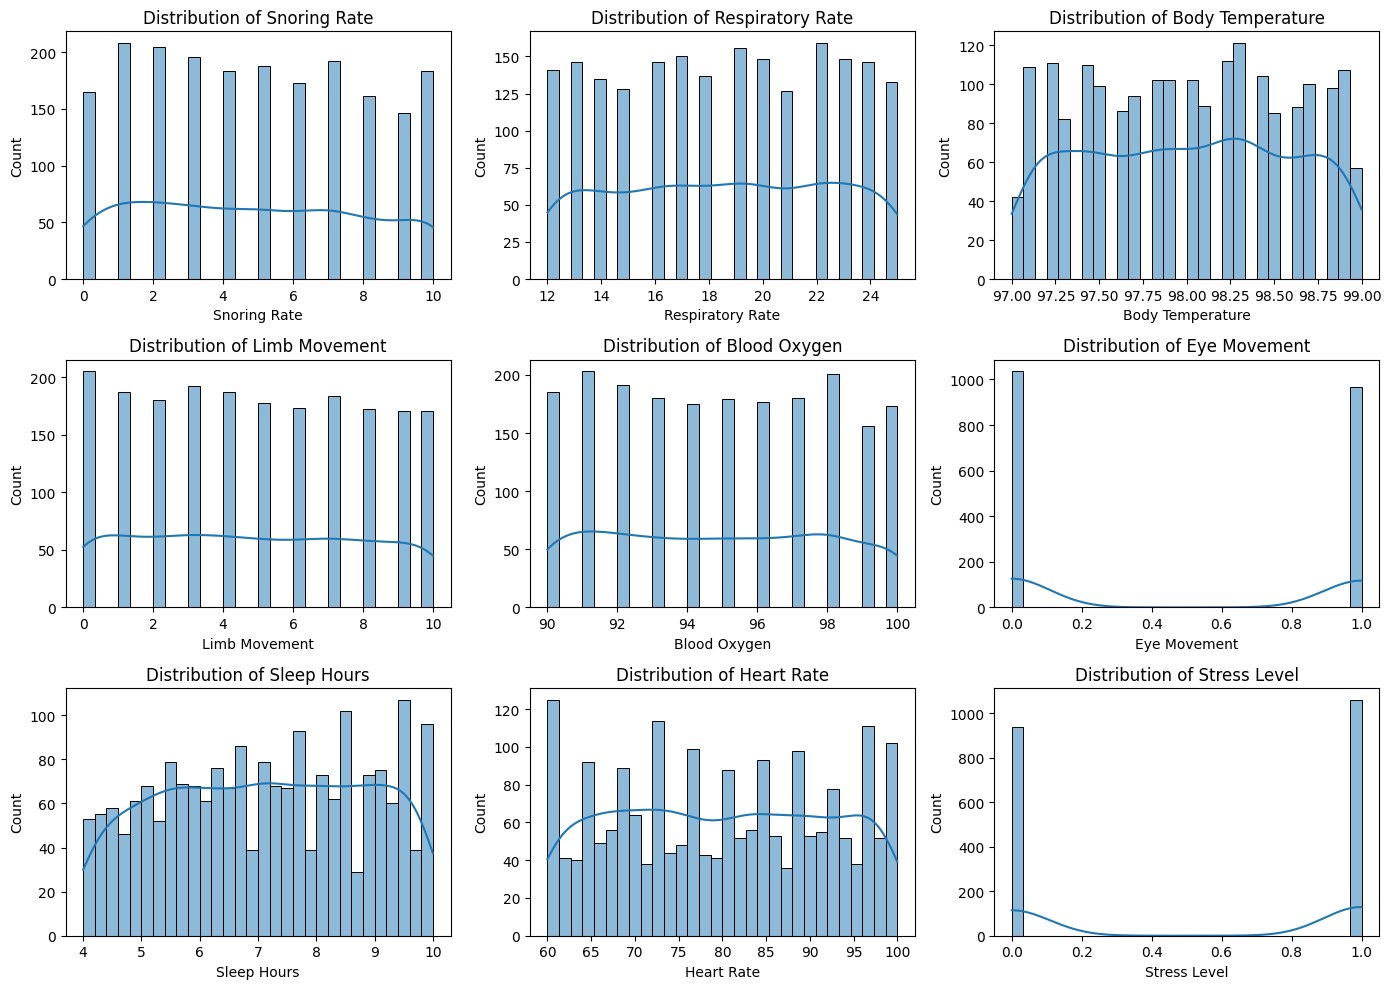

In [7]:
# Distribution plot for each feature
plt.figure(figsize=(14, 10))

# List of columns to plot
columns = ['Snoring Rate', 'Respiratory Rate', 'Body Temperature', 'Limb Movement', 
           'Blood Oxygen', 'Eye Movement', 'Sleep Hours', 
           'Heart Rate', 'Stress Level']

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Changed to 3x3 grid (9 slots)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

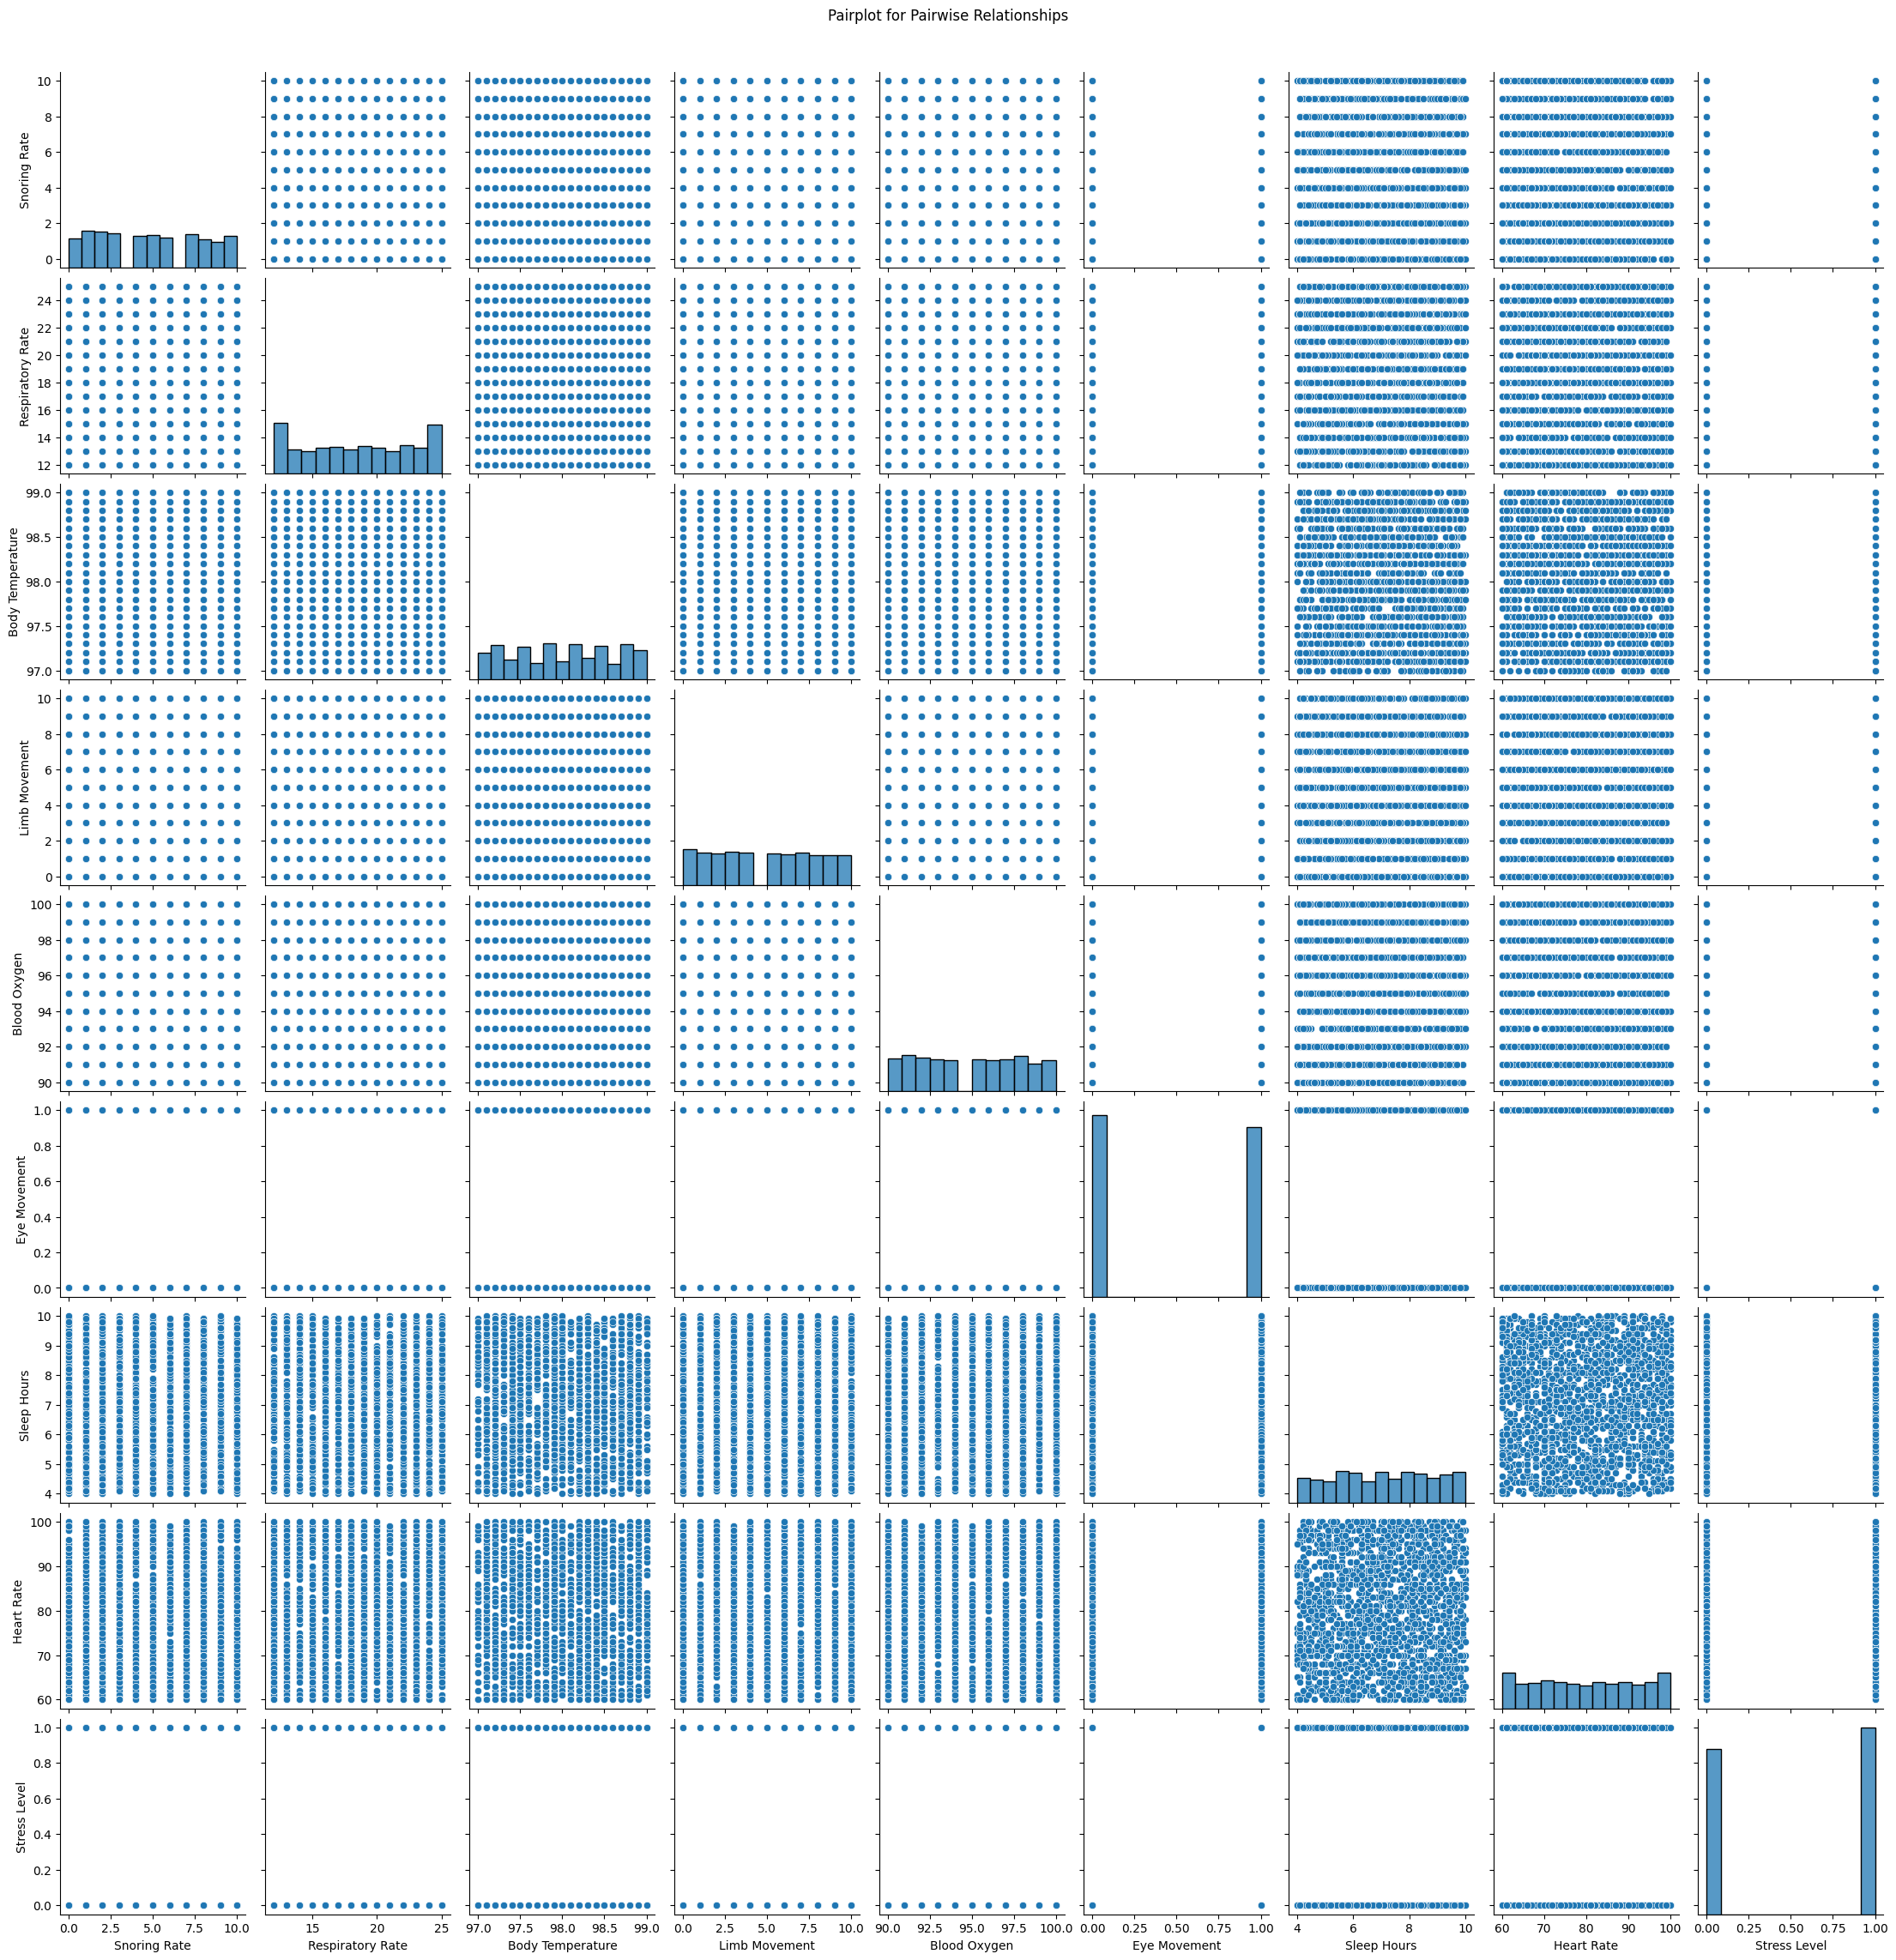

In [8]:
# plot Pairplot for pairwise relationships
sns.pairplot(df)
plt.suptitle('Pairplot for Pairwise Relationships', y=1.02)
plt.show()

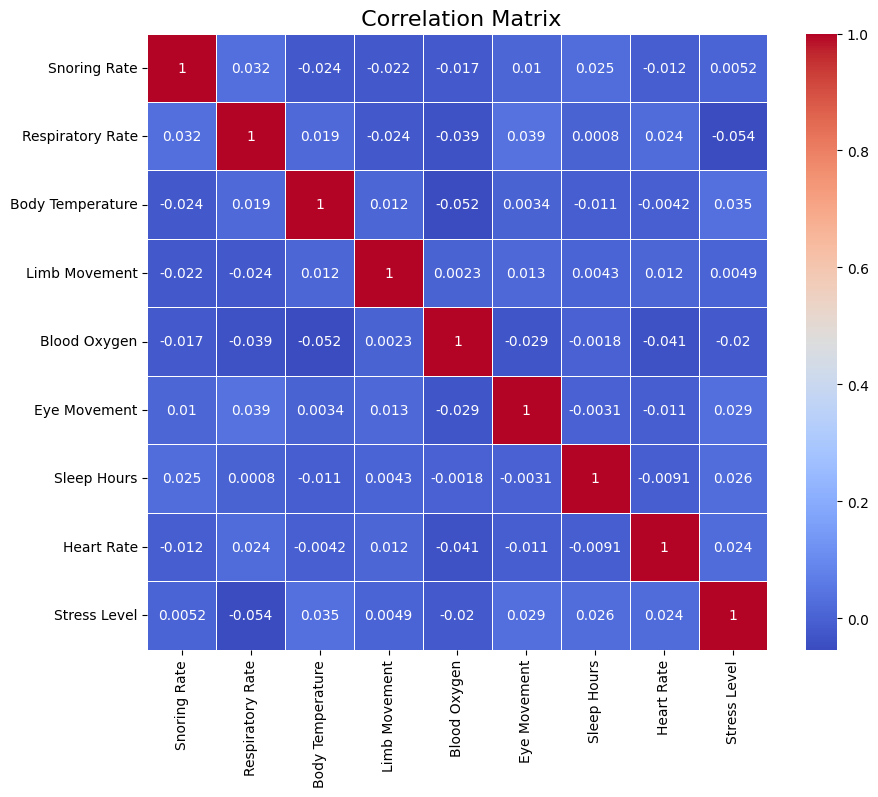

In [9]:
# Correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title(' Correlation Matrix', fontsize=16)
plt.show()

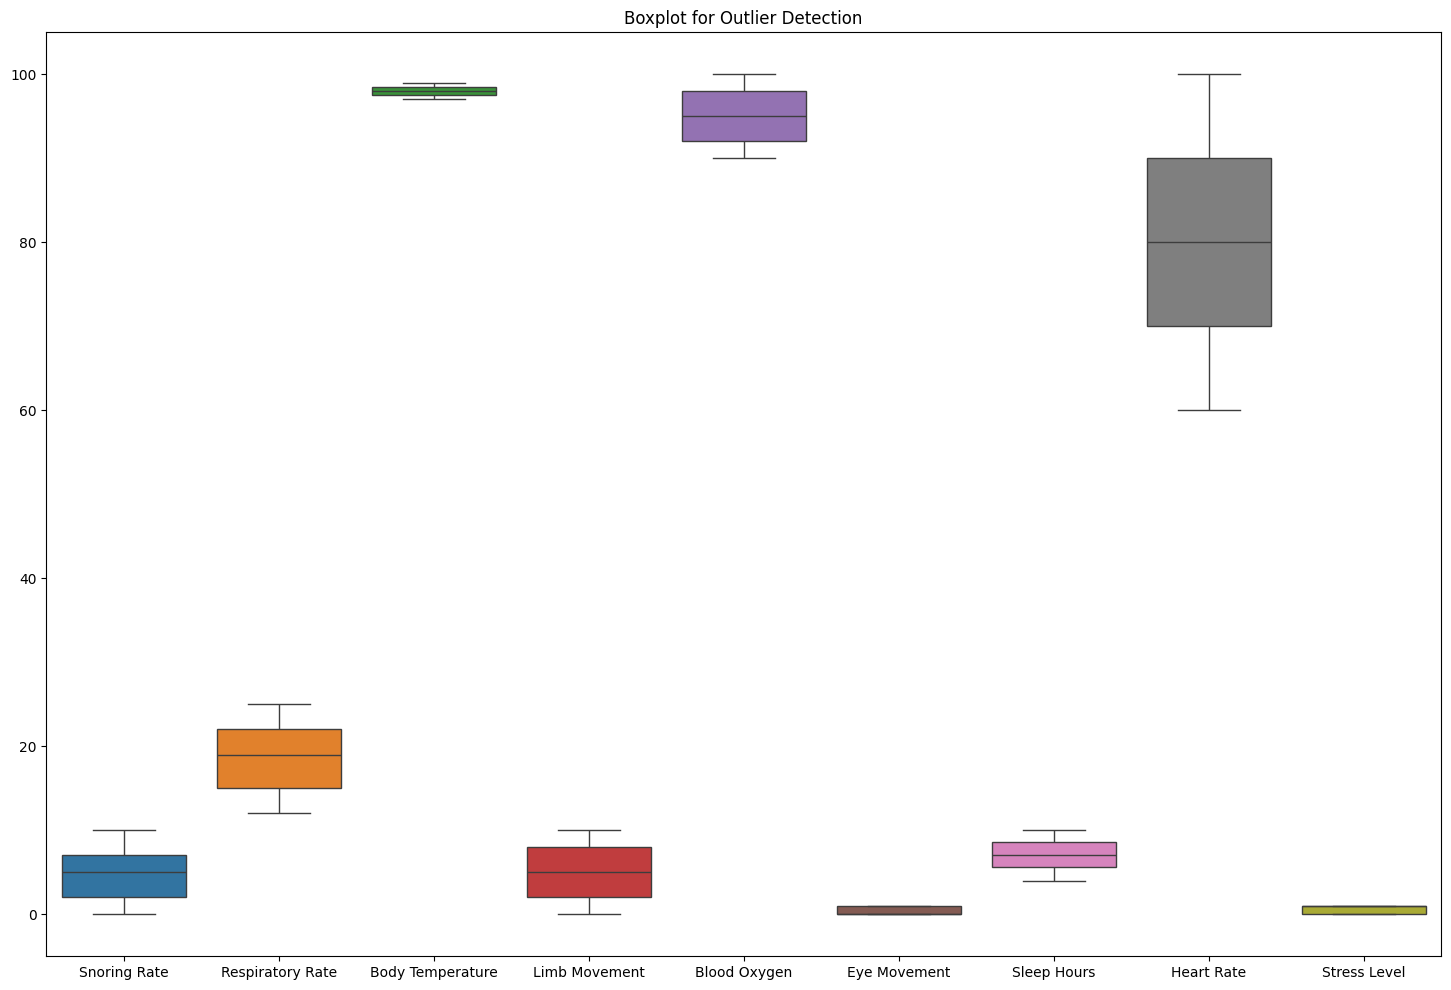

In [10]:
# Boxplot for outlier detection
plt.figure(figsize=(18, 12))
sns.boxplot(data=df[columns])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [11]:
X = df.drop('Stress Level', axis=1)   # type: ignore
y = df['Stress Level'] # type: ignore

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Normalize the features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize the ANN
model = Sequential()

# Add Input Layer and Hidden Layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add Output Layer (for binary classification)
model.add(Dense(units=1, activation='sigmoid'))

In [14]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [15]:
# Make predictions

y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.52
Precision: 0.52
Recall: 0.79
F1-Score: 0.63


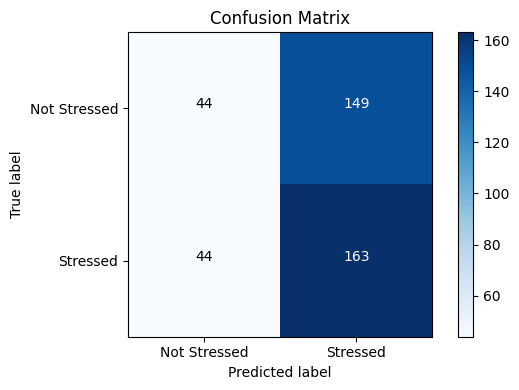

In [17]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

 

plt.figure(figsize=(6, 4))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

plt.title('Confusion Matrix')

plt.colorbar()

tick_marks = np.arange(2)

plt.xticks(tick_marks, ['Not Stressed', 'Stressed'])

plt.yticks(tick_marks, ['Not Stressed', 'Stressed'])

thresh = cm.max() / 2

for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [18]:
joblib.dump(model, 'stress_detection_model.pkl')

['stress_detection_model.pkl']